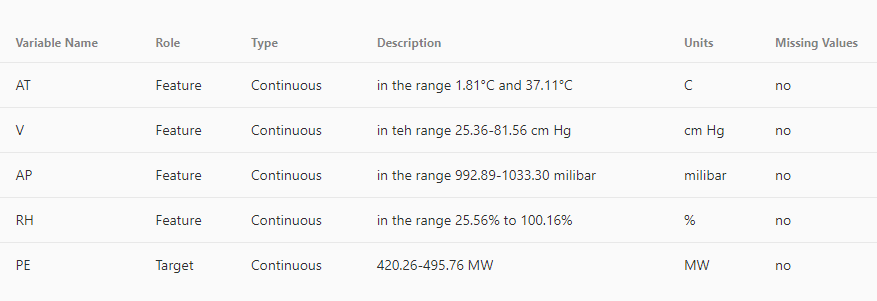

Набор данных содержит 9568 точек данных, собранных с электростанции комбинированного цикла за 6 лет (2006-2011), когда электростанция была настроена на работу с полной нагрузкой. Характеристики включают в себя среднечасовые значения температуры окружающей среды (T), давления окружающей среды (AP), относительной влажности (RH) и разрежения выхлопных газов (V) для прогнозирования чистой часовой выработки электроэнергии (EP) установкой.
Электростанция комбинированного цикла (ПГУ) состоит из газовых турбин (GT), паровых турбин (ST) и парогенераторов с рекуперацией тепла. На ПГУ электроэнергия вырабатывается газовыми и паровыми турбинами, которые объединены в одном цикле, и передается от одной турбины к другой. В то время как вакуум поступает из паровой турбины и оказывает влияние на нее, три другие переменные окружающей среды влияют на производительность GT.
Для сопоставимости с нашими базовыми исследованиями и для того, чтобы можно было провести статистические тесты в 5 раз по 2 раза, мы предоставляем данные, перетасованные пять раз. Для каждой перетасовки выполняется 2-кратный CV, и полученные 10 измерений используются для статистического тестирования.

Загрузка датасета и вывод информации о нём

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo


data = fetch_ucirepo(id=294)
# Извлекаем признаки и целевые переменные
X = data.data.features
y = data.data.targets
y.columns = ['target']

# Объединяем X и y
df = pd.concat([X, y], axis=1)

# Выводим шапку объединенного датасета
df.head()

,AT,V,AP,RH,target
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.describe()

,AT,V,AP,RH,target
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Информация о категориальных признаках

In [ ]:
df.describe()

,AT,V,AP,RH,target
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   target  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isnull().sum()

,0
AT,0
V,0
AP,0
RH,0
target,0


Есть пропуски, поэтому заменяем их средним

Функция для вывода метрик

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Кодирование категориальных переменных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   target  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Матрица корреляции

<Axes: >

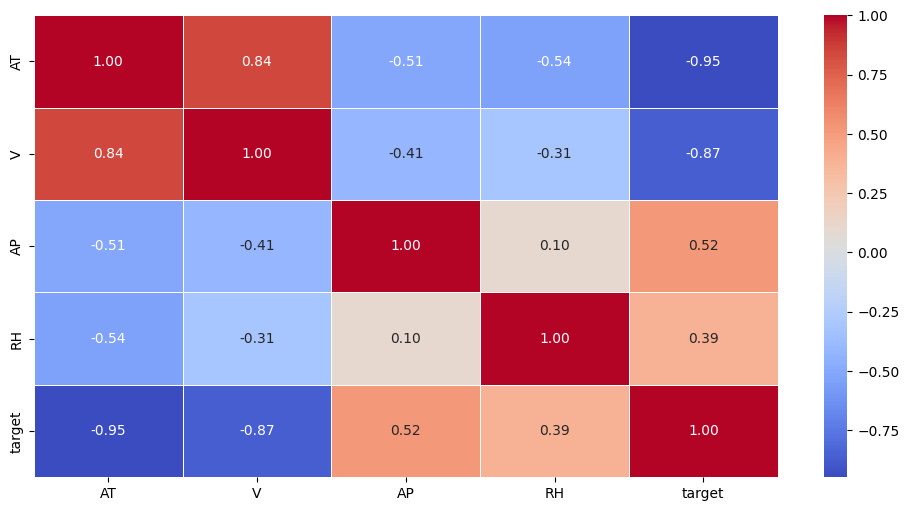

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Линейная регрессия

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

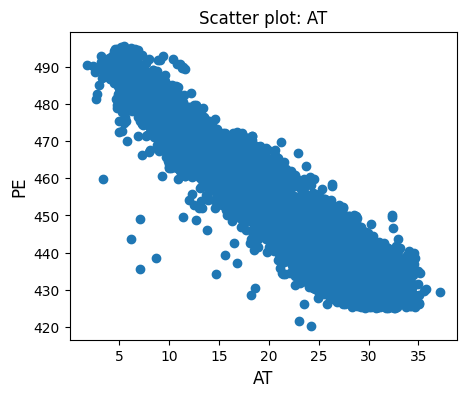

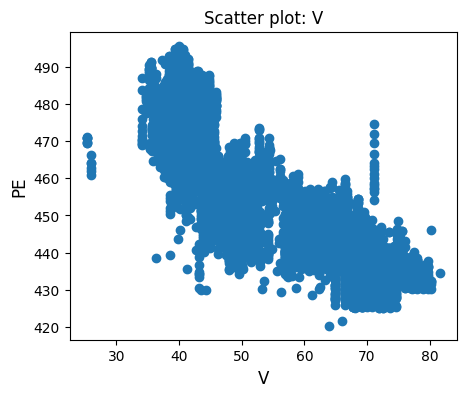

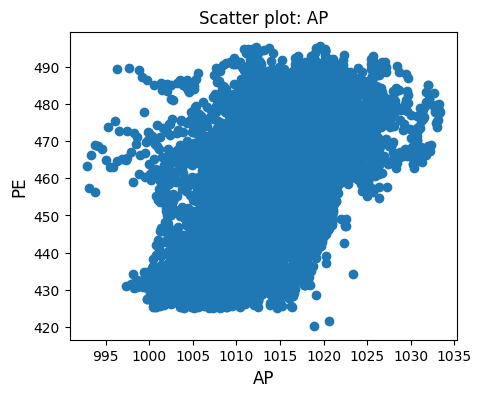

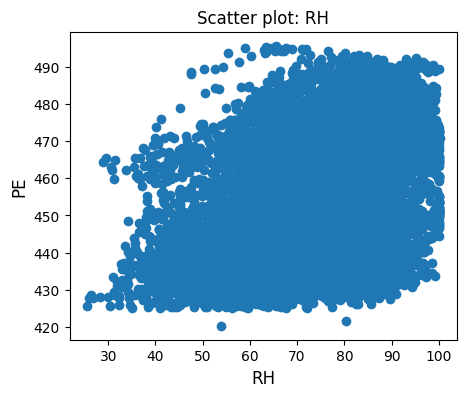

In [ ]:
# Пробежимся по каждому признаку и построим графики рассеяния
for feature_name in X.columns:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[feature_name], y)
    plt.ylabel('PE', size=12)
    plt.xlabel(feature_name, size=12)
    plt.title(f'Scatter plot: {feature_name}')
    plt.show()


In [ ]:
column = 'V'
column_display_name = 'V'

Нормализация данных

In [ ]:
from sklearn.preprocessing import StandardScaler

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Преобразуем обратно в DataFrame, чтобы сохранить имена столбцов
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  4.5849
  R2: 0.9257
 Adjusted R2: 0.9256
 Cross Validated R2: 0.9291


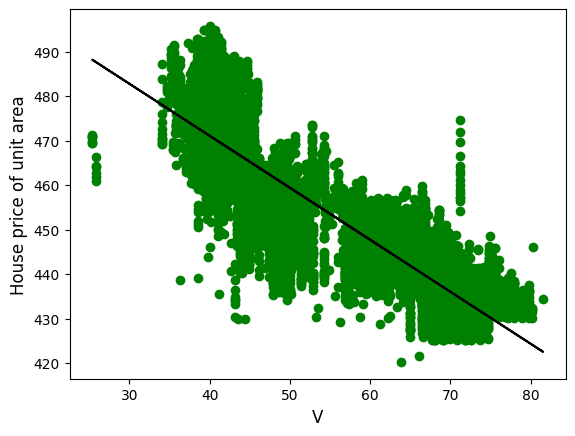

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df[column].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['target'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('House price of unit area', size=12)
plt.xlabel(column_display_name, size=12)
plt.show()

# Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  4.1969
  R2: 0.9399
 Adjusted R2: 0.9392
 Cross Validated R2: 0.9405


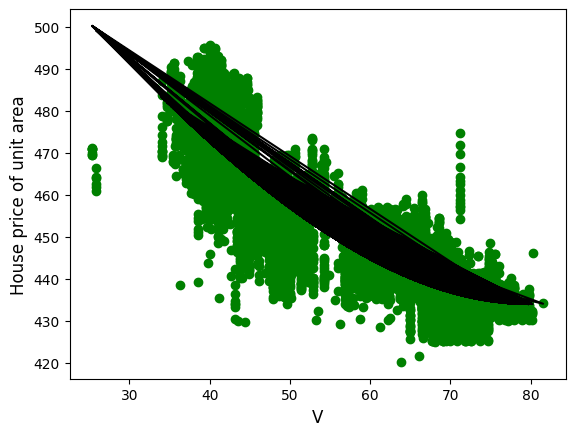

In [ ]:
X2 = df[column].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['target'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('House price of unit area', size=12)
plt.xlabel(column_display_name, size=12)
plt.show()

# Регрессия дерева принятия решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  4.8294
  R2: 0.9176
 Adjusted R2: 0.9174
 Cross Validated R2: 0.9264


# Регрессия случайного леса

In [ ]:

from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Create a stepwise regression model
modelRF = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

# Fit the model to the data
modelRF.fit(X_train_poly, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test_poly)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train_poly, y_train, X_test_poly, y_test, y_rf_pred)

RMSE:  3.4749
  R2: 0.9584
 Adjusted R2: 0.958
 Cross Validated R2: 0.9548


Эта модель обладает лучшими метриками, чем остальные

# Регрессия опорных векторов (SVR)

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.5342
  R2: 0.9291
 Adjusted R2: 0.929
 Cross Validated R2: 0.9276


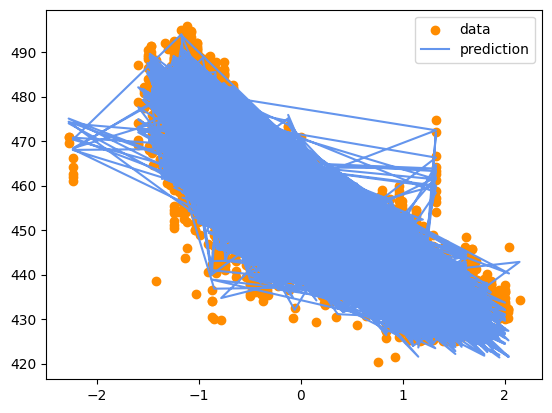

In [ ]:
plt.scatter(X_train[column], y_train, color='darkorange',
            label='data')
plt.plot(X_train[column], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8.2068
  R2: 0.7678
 Adjusted R2: 0.7673
 Cross Validated R2: 0.7833


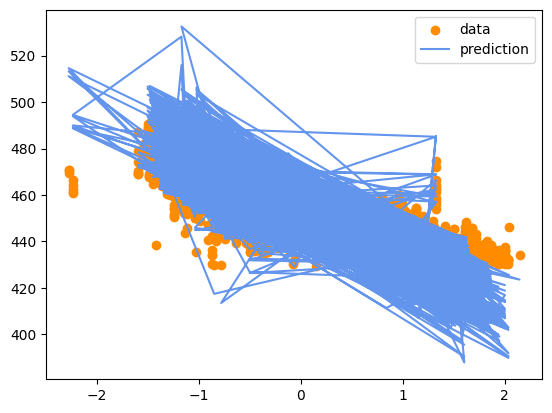

In [ ]:
plt.scatter(X_train[column], y_train, color='darkorange',
            label='data')
plt.plot(X_train[column], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.0958
  R2: 0.9422
 Adjusted R2: 0.942
 Cross Validated R2: 0.9396


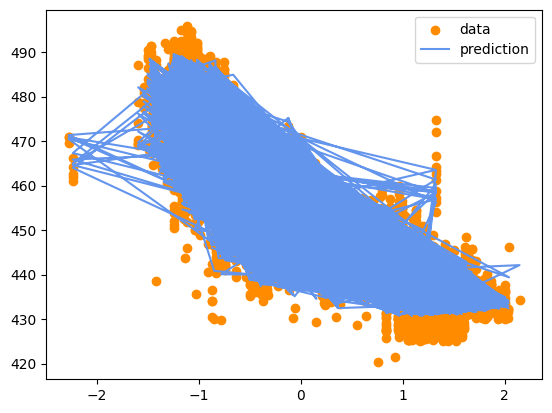

In [ ]:
plt.scatter(X_train[column], y_train, color='darkorange',
            label='data')
plt.plot(X_train[column], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  4.5339
  R2: 0.9291
 Adjusted R2: 0.929
 Cross Validated R2: 0.9266


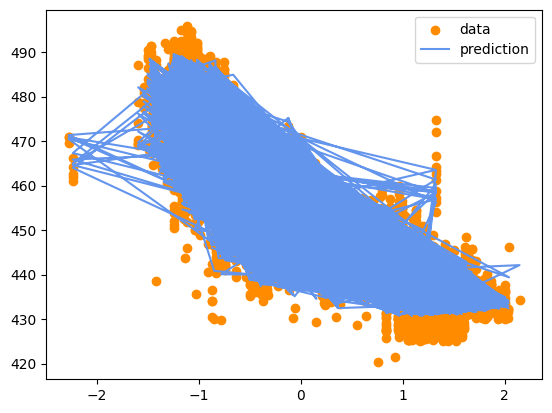

In [ ]:
plt.scatter(X_train[column], y_train, color='darkorange',
            label='data')
plt.plot(X_train[column], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Выводы
Регрессия случайного леса показала наилучший R^2 среди всех моделей